In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np

In [3]:
df6 = pd.read_csv ("data/export_04_10_march.csv")
df1 = pd.read_csv ("data/export_10_15_march.csv")
df2 = pd.read_csv ("data/export_15_20_march.csv")
df3 = pd.read_csv ("data/export_20_25_march.csv")
df4 = pd.read_csv ("data/export_25_30_march.csv")
df5 = pd.read_csv ("data/export_30_06_april.csv")

In [4]:
df = pd.concat([df6, df1, df2, df3, df4, df5], axis=0, sort=False)

In [5]:
df.head()

,SDATE,SHOUR,CITY,TOWN,CI,SUM(TRAFFIC_DL+TRAFFIC_UL),SUM(TRAFFIC_DL),SUM(TRAFFIC_UL),COUNT(*),COUNT(DISTINCT(MSISDN))
0,07-03-20,23,B66,AED,302490103501579,33956823,16302611,17654212,92,42
1,07-03-20,23,B4,OBV,302490103221013,1213948,670521,543427,9,7
2,07-03-20,23,B4,OTR,302490105189162,2374220,1169179,1205041,2,2
3,07-03-20,23,B4,ACA,302490103425568,26332,18198,8134,2,2
4,07-03-20,23,B66,ACA,302490103469323,7575391,3594292,3981099,14,8


In [6]:
df.columns = df.columns.str.replace("[()]", "_")

In [7]:
df.tail()

,SDATE,SHOUR,CITY,TOWN,CI,SUM_TRAFFIC_DL+TRAFFIC_UL_,SUM_TRAFFIC_DL_,SUM_TRAFFIC_UL_,COUNT_*_,COUNT_DISTINCT_MSISDN__
2533366,06-04-20,20,B4,OTR,302490102457622,2054673,783645,1271028,1,1
2533367,06-04-20,20,B13,OTR,302490102596129,14801,8943,5858,1,1
2533368,06-04-20,20,B13,ACA,302490103451661,16155,9173,6982,1,1
2533369,06-04-20,20,B4,AIR,302490103592490,304779,141876,162903,1,1
2533370,06-04-20,20,B4,BVI,302490103842848,6643950,3388764,3255186,1,1


In [8]:
df.shape

(9911730, 10)

In [9]:
df.dtypes

SDATE                         object
SHOUR                          int64
CITY                          object
TOWN                          object
CI                             int64
SUM_TRAFFIC_DL+TRAFFIC_UL_     int64
SUM_TRAFFIC_DL_                int64
SUM_TRAFFIC_UL_                int64
COUNT_*_                       int64
COUNT_DISTINCT_MSISDN__        int64
dtype: object

### datetime corrections in the dataset

In [10]:
df['SDATE'] = pd.to_datetime(df.SDATE,dayfirst=True)

In [11]:
df['just_date'] = df['SDATE'].dt.date

In [12]:
df['SHOUR'] = df['SHOUR'].map(str) + ':00:00'

In [13]:
df['date_time'] = pd.to_datetime(df['just_date'].apply(str)+' '+df['SHOUR'])
df.drop('just_date', axis=1, inplace=True)

In [14]:
df['SHOUR'] =  pd.to_datetime(df['SHOUR'], format='%H:%M:%S')

In [15]:
df['SDATE'].apply(str)

0          2020-03-07 00:00:00
1          2020-03-07 00:00:00
2          2020-03-07 00:00:00
3          2020-03-07 00:00:00
4          2020-03-07 00:00:00
                  ...         
2533366    2020-04-06 00:00:00
2533367    2020-04-06 00:00:00
2533368    2020-04-06 00:00:00
2533369    2020-04-06 00:00:00
2533370    2020-04-06 00:00:00
Name: SDATE, Length: 9911730, dtype: object

In [16]:
df['SDATE'].dt.date
#df['SHOUR'] = df['SHOUR'].dt.time
#df['SHOUR'] =  pd.to_datetime(df['SHOUR'], format='%H:%M:%S')

0          2020-03-07
1          2020-03-07
2          2020-03-07
3          2020-03-07
4          2020-03-07
              ...    
2533366    2020-04-06
2533367    2020-04-06
2533368    2020-04-06
2533369    2020-04-06
2533370    2020-04-06
Name: SDATE, Length: 9911730, dtype: object

In [17]:
#df['date']= pd.to_datetime(df['date']) 
#df['date1'] = df.date.apply(lambda x: x.strftime('%Y%d%m')).astype(int)

In [18]:
df.head()

,SDATE,SHOUR,CITY,TOWN,CI,SUM_TRAFFIC_DL+TRAFFIC_UL_,SUM_TRAFFIC_DL_,SUM_TRAFFIC_UL_,COUNT_*_,COUNT_DISTINCT_MSISDN__,date_time
0,2020-03-07,1900-01-01 23:00:00,B66,AED,302490103501579,33956823,16302611,17654212,92,42,2020-03-07 23:00:00
1,2020-03-07,1900-01-01 23:00:00,B4,OBV,302490103221013,1213948,670521,543427,9,7,2020-03-07 23:00:00
2,2020-03-07,1900-01-01 23:00:00,B4,OTR,302490105189162,2374220,1169179,1205041,2,2,2020-03-07 23:00:00
3,2020-03-07,1900-01-01 23:00:00,B4,ACA,302490103425568,26332,18198,8134,2,2,2020-03-07 23:00:00
4,2020-03-07,1900-01-01 23:00:00,B66,ACA,302490103469323,7575391,3594292,3981099,14,8,2020-03-07 23:00:00


In [19]:
df.dtypes

SDATE                         datetime64[ns]
SHOUR                         datetime64[ns]
CITY                                  object
TOWN                                  object
CI                                     int64
SUM_TRAFFIC_DL+TRAFFIC_UL_             int64
SUM_TRAFFIC_DL_                        int64
SUM_TRAFFIC_UL_                        int64
COUNT_*_                               int64
COUNT_DISTINCT_MSISDN__                int64
date_time                     datetime64[ns]
dtype: object

### Slicing operations in pandas

In [ ]:
df['TOWN'][]

In [267]:
#double brackets, means dataframe
df[['TOWN','CITY']].head()

,TOWN,CITY
0,AED,B66
1,OBV,B4
2,OTR,B4
3,ACA,B4
4,ACA,B66


In [268]:
type (df[['TOWN']].head())

pandas.core.frame.DataFrame

In [271]:
#single bracket means Series with only 1 parameter
df['TOWN'].head()

0    AED
1    OBV
2    OTR
3    ACA
4    ACA
Name: TOWN, dtype: object

In [272]:
#slicing practices, from index 0 to 9 (not including 10)
df['CITY'][0:10]

0    B66
1     B4
2     B4
3     B4
4    B66
5     B7
6    B66
7    B66
8     B4
9    B66
Name: CITY, dtype: object

In [273]:
#slicing with columns - dataframe
df.loc[:,['CITY']].head()

,CITY
0,B66
1,B4
2,B4
3,B4
4,B66


In [274]:
#slicing with columns - series
df.loc[:,'CITY'].head()

0    B66
1     B4
2     B4
3     B4
4    B66
Name: CITY, dtype: object

### filtering the data 

In [278]:
df["CITY"].value_counts()

B66    4032806
B4     2979495
B13    1774674
B7     1090180
B71        475
Name: CITY, dtype: int64

In [279]:
df['TOWN'].value_counts()

OTR          4708505
BVA          1378659
ACA           791640
AED           683534
OKT           337812
OOT           297169
OSC           259093
OLO           253477
OWD           198203
BVI           190263
OBA           120171
BAB           102234
BKE            46004
OBF            45370
OKG            43786
AIR            40530
OPB            40223
ARD            39473
ALB            33124
BKL            31768
BPG            29745
AFS            25382
BNA            22027
OBV            21116
BPE            19134
AMH            17179
BVE            14821
OCO            13825
BCC            12215
BCR             9989
BCB             9657
OBK             9122
OCW             8852
OLD             5745
BWI             5473
BPR             4053
OPK             3381
Test_site          3
Name: TOWN, dtype: int64

In [280]:
df_OTR = df['TOWN'] == 'OTR'

In [281]:
df_OTR

0          False
1          False
2           True
3          False
4          False
           ...  
2533366     True
2533367     True
2533368    False
2533369    False
2533370    False
Name: TOWN, Length: 9911730, dtype: bool

In [282]:
df[df_OTR].head()

,SDATE,SHOUR,CITY,TOWN,CI,SUM_TRAFFIC_DL+TRAFFIC_UL_,SUM_TRAFFIC_DL_,SUM_TRAFFIC_UL_,COUNT_*_,COUNT_DISTINCT_MSISDN__,date_time
2,2020-03-07,1900-01-01 23:00:00,B4,OTR,302490105189162,2374220,1169179,1205041,2,2,2020-03-07 23:00:00
5,2020-03-07,1900-01-01 23:00:00,B7,OTR,302490102475032,1774407,810135,964272,3,3,2020-03-07 23:00:00
6,2020-03-07,1900-01-01 23:00:00,B66,OTR,302490102426655,6877102,3912911,2964191,37,19,2020-03-07 23:00:00
12,2020-03-07,1900-01-01 23:00:00,B66,OTR,302490102405387,3700152,2058556,1641596,11,8,2020-03-07 23:00:00
15,2020-03-07,1900-01-01 23:00:00,B66,OTR,302490102425355,15594819,7737510,7857309,83,55,2020-03-07 23:00:00


In [283]:
df.loc[df_OTR , :]

,SDATE,SHOUR,CITY,TOWN,CI,SUM_TRAFFIC_DL+TRAFFIC_UL_,SUM_TRAFFIC_DL_,SUM_TRAFFIC_UL_,COUNT_*_,COUNT_DISTINCT_MSISDN__,date_time
2,2020-03-07,1900-01-01 23:00:00,B4,OTR,302490105189162,2374220,1169179,1205041,2,2,2020-03-07 23:00:00
5,2020-03-07,1900-01-01 23:00:00,B7,OTR,302490102475032,1774407,810135,964272,3,3,2020-03-07 23:00:00
6,2020-03-07,1900-01-01 23:00:00,B66,OTR,302490102426655,6877102,3912911,2964191,37,19,2020-03-07 23:00:00
12,2020-03-07,1900-01-01 23:00:00,B66,OTR,302490102405387,3700152,2058556,1641596,11,8,2020-03-07 23:00:00
15,2020-03-07,1900-01-01 23:00:00,B66,OTR,302490102425355,15594819,7737510,7857309,83,55,2020-03-07 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2533360,2020-04-06,1900-01-01 20:00:00,B4,OTR,302490102628896,151180,88912,62268,1,1,2020-04-06 20:00:00
2533363,2020-04-06,1900-01-01 20:00:00,B66,OTR,302490102939679,58574,22902,35672,1,1,2020-04-06 20:00:00
2533364,2020-04-06,1900-01-01 20:00:00,B4,OTR,302490102578986,326147,152048,174099,1,1,2020-04-06 20:00:00
2533366,2020-04-06,1900-01-01 20:00:00,B4,OTR,302490102457622,2054673,783645,1271028,1,1,2020-04-06 20:00:00


In [294]:
df['SUM_TRAFFIC_DL_'].sum()

30872180585897

In [295]:
df.sum()

CI                            8566217147375320761
SUM_TRAFFIC_DL+TRAFFIC_UL_         57850308417001
SUM_TRAFFIC_DL_                    30872180585897
SUM_TRAFFIC_UL_                    26978127831104
COUNT_*_                                162882581
COUNT_DISTINCT_MSISDN__                 103886093
dtype: int64

### missing data

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9911730 entries, 0 to 2533370
Data columns (total 11 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   SDATE                       datetime64[ns]
 1   SHOUR                       datetime64[ns]
 2   CITY                        object        
 3   TOWN                        object        
 4   CI                          int64         
 5   SUM_TRAFFIC_DL+TRAFFIC_UL_  int64         
 6   SUM_TRAFFIC_DL_             int64         
 7   SUM_TRAFFIC_UL_             int64         
 8   COUNT_*_                    int64         
 9   COUNT_DISTINCT_MSISDN__     int64         
 10  date_time                   datetime64[ns]
dtypes: datetime64[ns](3), int64(6), object(2)
memory usage: 907.4+ MB


In [298]:
df['CI'].isna().sum()

0

In [299]:
df.isna()

,SDATE,SHOUR,CITY,TOWN,CI,SUM_TRAFFIC_DL+TRAFFIC_UL_,SUM_TRAFFIC_DL_,SUM_TRAFFIC_UL_,COUNT_*_,COUNT_DISTINCT_MSISDN__,date_time
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2533366,False,False,False,False,False,False,False,False,False,False,False
2533367,False,False,False,False,False,False,False,False,False,False,False
2533368,False,False,False,False,False,False,False,False,False,False,False
2533369,False,False,False,False,False,False,False,False,False,False,False


### Graphical visualization on the data

In [263]:
plt.rcParams['agg.path.chunksize'] = 10000

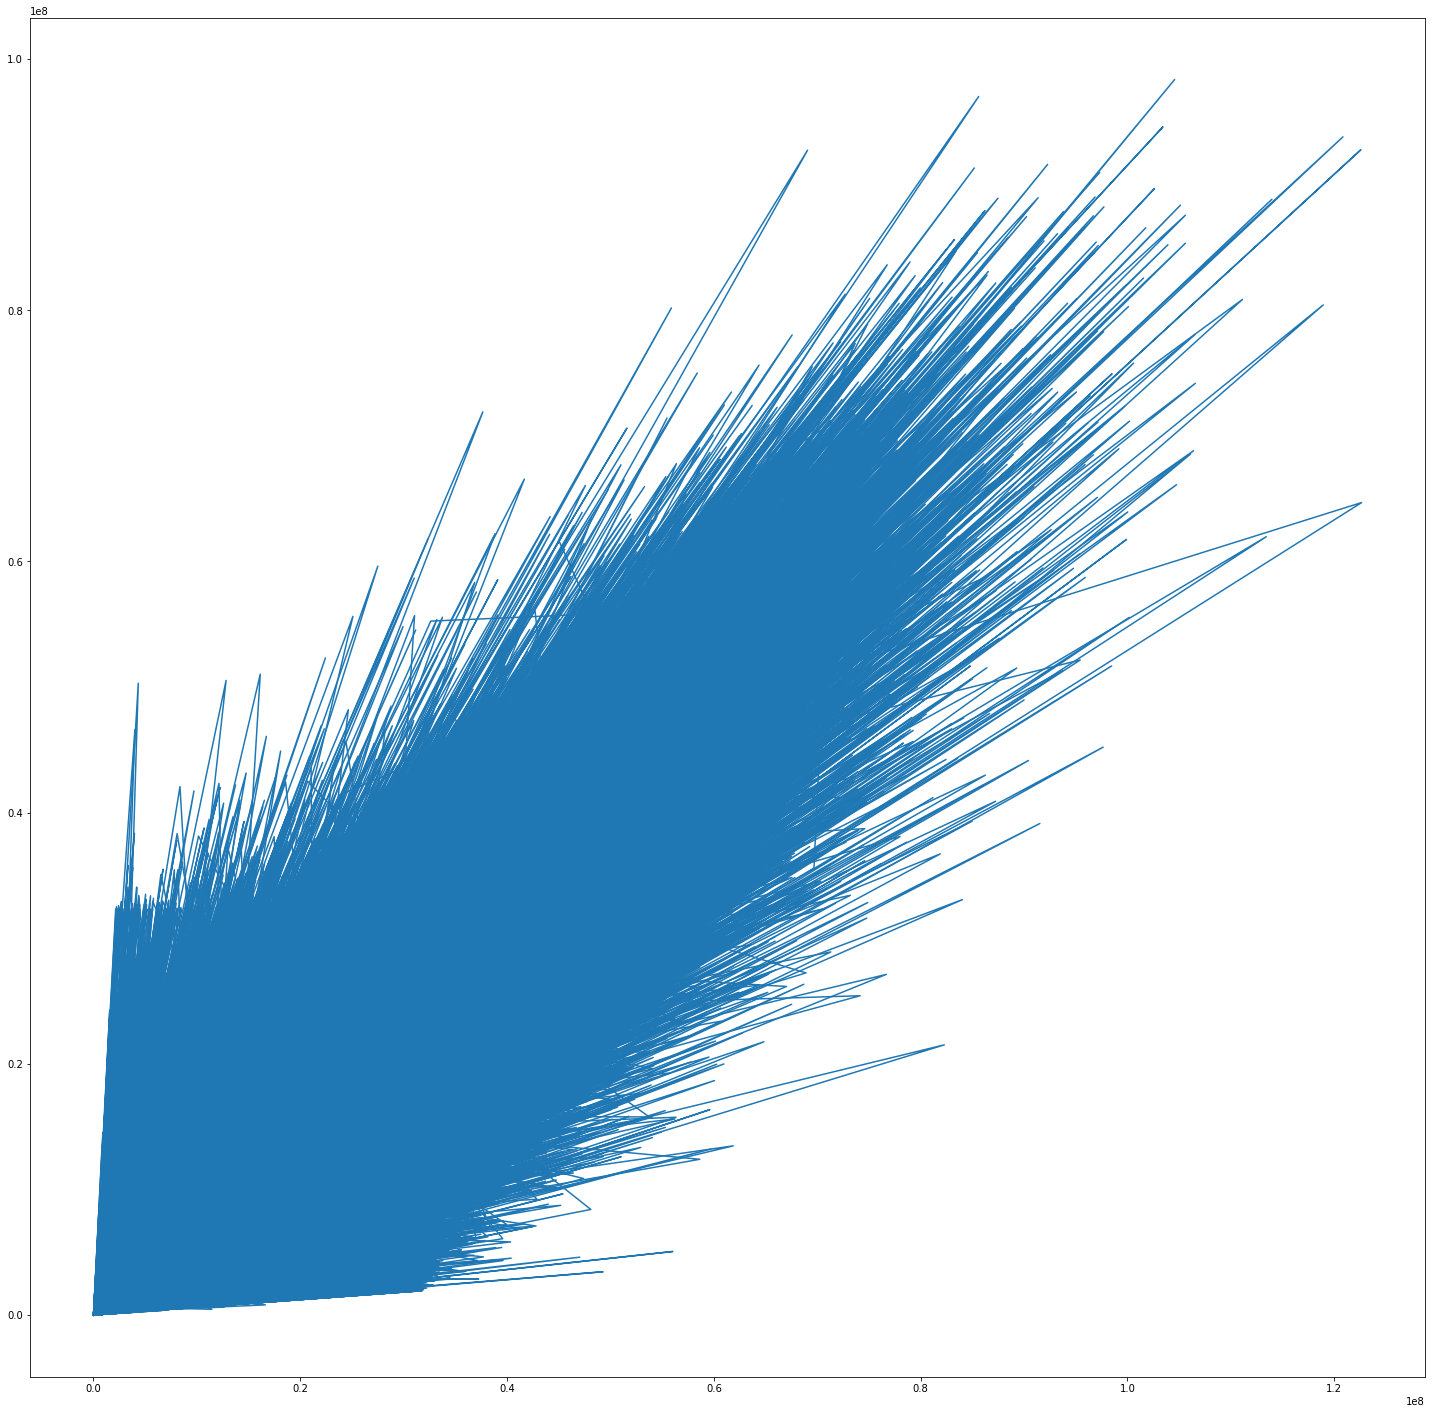

<Figure size 1800x1800 with 0 Axes>

In [266]:
plt.plot(df.SUM_TRAFFIC_DL_, df.SUM_TRAFFIC_UL_)
plt.figure(figsize=(25, 25))
plt.show()

In [284]:
#pivot table
table = pd.pivot_table(df, values=['SUM_TRAFFIC_DL_', 'SUM_TRAFFIC_UL_',
                                   'COUNT_*_', 'COUNT_DISTINCT_MSISDN__'], index=['TOWN', 'CI','SDATE' ,'SHOUR'], 
                       aggfunc=np.sum, fill_value=0)

#aggfunc={'D': np.mean, 'E': np.mean}

In [285]:
table

COUNT_*_  \
TOWN      CI              SDATE      SHOUR                           
ACA       302490103424267 2020-03-07 1900-01-01 23:00:00        29   
                          2020-03-08 1900-01-01 00:00:00        18   
                                     1900-01-01 01:00:00         7   
                                     1900-01-01 03:00:00         8   
                                     1900-01-01 04:00:00         2   
...                                                            ...   
OWD       302490230576651 2020-03-15 1900-01-01 18:00:00         1   
                          2020-03-16 1900-01-01 11:00:00         1   
Test_site 302490240743947 2020-03-11 1900-01-01 12:00:00         1   
                          2020-03-12 1900-01-01 14:00:00         1   
                          2020-03-19 1900-01-01 16:00:00         1   

                                                          COUNT_DISTINCT_MSISDN__  \
TOWN      CI              SDATE      SHOUR                                          
ACA       302490103424267 2020-03-07 1900-01-01 23:00:00                       16   
                          2020-03-08 1900-01-01 00:00:00                       12   
                                     1900-01-01 01:00:00                        7   
                                     1900-01-01 03:00:00                        6   
                                     1900-01-01 04:00:00                        1   
...                                                                           ...   
OWD       302490230576651 2020-03-15 1900-01-01 18:00:00                        1   
                          2020-03-16 1900-01-01 11:00:00                        1   
Test_site 302490240743947 2020-03-11 1900-01-01 12:00:00                        1   
                          2020-03-12 1900-01-01 14:00:00                        1   
                          2020-03-19 1900-01-01 16:00:00                        1   

                                                          SUM_TRAFFIC_DL_  \
TOWN      CI              SDATE      SHOUR                                  
ACA       302490103424267 2020-03-07 1900-01-01 23:00:00          1406030   
                          2020-03-08 1900-01-01 00:00:00          5348709   
                                     1900-01-01 01:00:00           274820   
                                     1900-01-01 03:00:00           614191   
                                     1900-01-01 04:00:00            36483   
...                                                                   ...   
OWD       302490230576651 2020-03-15 1900-01-01 18:00:00             5006   
                          2020-03-16 1900-01-01 11:00:00             2987   
Test_site 302490240743947 2020-03-11 1900-01-01 12:00:00            84703   
                          2020-03-12 1900-01-01 14:00:00          1321484   
                          2020-03-19 1900-01-01 16:00:00           120338   

                                                          SUM_TRAFFIC_UL_  
TOWN      CI              SDATE      SHOUR                                 
ACA       302490103424267 2020-03-07 1900-01-01 23:00:00          1618286  
                          2020-03-08 1900-01-01 00:00:00          3767692  
                                     1900-01-01 01:00:00           301425  
                                     1900-01-01 03:00:00           517829  
                                     1900-01-01 04:00:00            26936  
...                                                                   ...  
OWD       302490230576651 2020-03-15 1900-01-01 18:00:00             4844  
                          2020-03-16 1900-01-01 11:00:00             4873  
Test_site 302490240743947 2020-03-11 1900-01-01 12:00:00            75234  
                          2020-03-12 1900-01-01 14:00:00          1928420  
                          2020-03-19 1900-01-01 16:00:00            85637  

[9872757 rows x 4 columns]

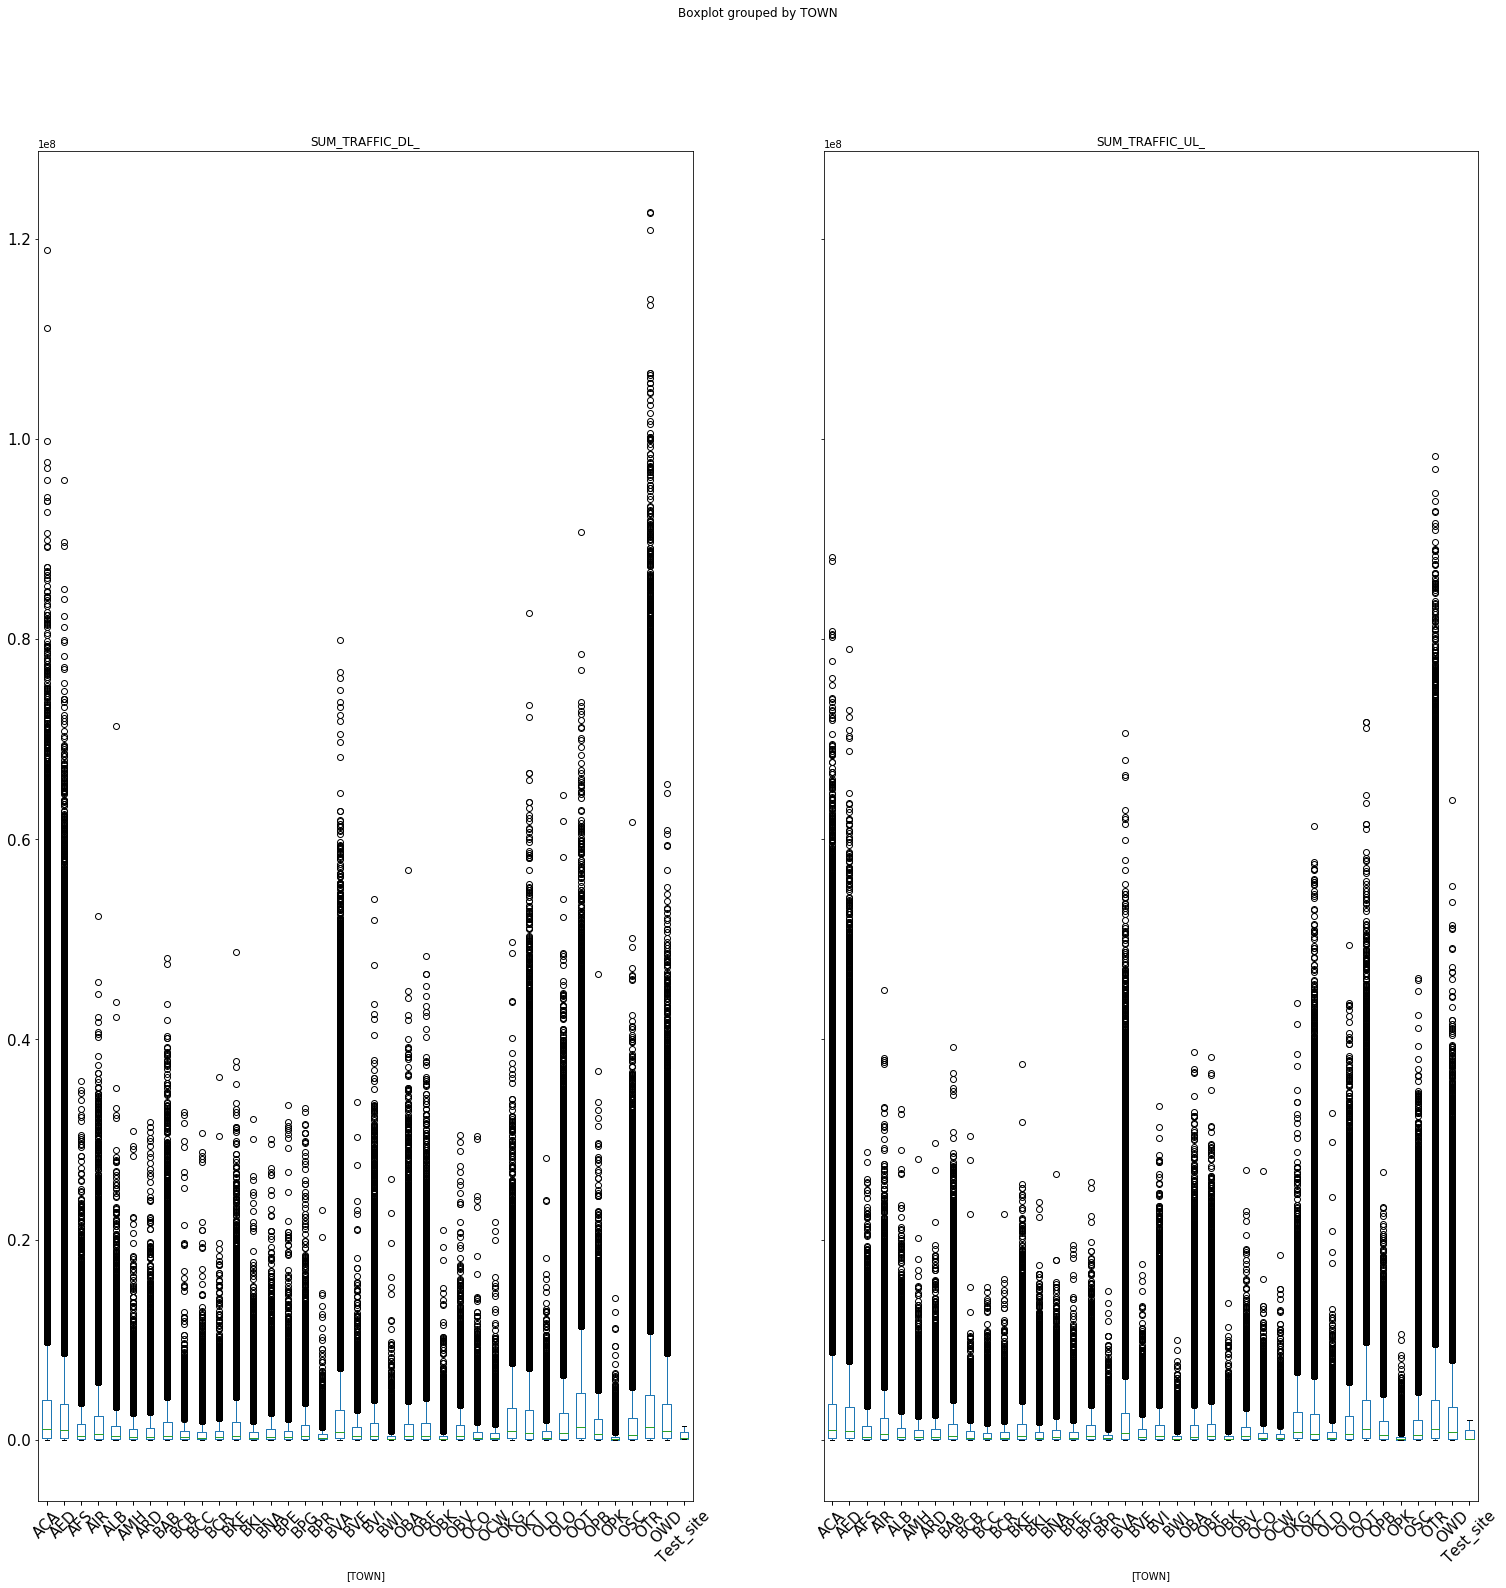

In [286]:
boxplot = df.boxplot(column=['SUM_TRAFFIC_DL_', 'SUM_TRAFFIC_UL_'], by = ['TOWN'],grid=False, rot=45, fontsize=15)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


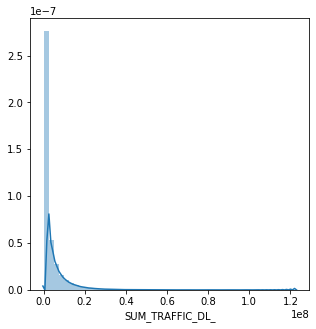

In [290]:
plt.rcParams["figure.figsize"] = (5,5)
sns.distplot(df['SUM_TRAFFIC_DL_'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


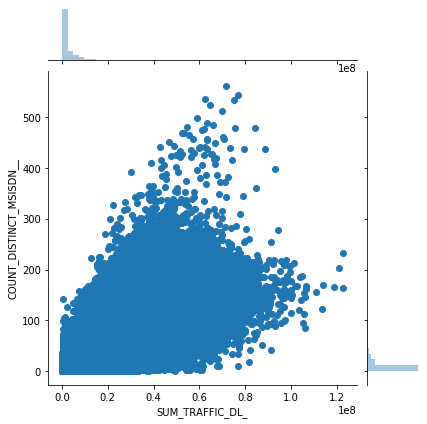

In [291]:
sns.jointplot('SUM_TRAFFIC_DL_', 'COUNT_DISTINCT_MSISDN__', df)
plt.show()

In [292]:
time_df_sdate = df.groupby('SDATE')['SUM_TRAFFIC_UL_','SUM_TRAFFIC_DL_'].sum()
print(time_df_sdate.head())

            SUM_TRAFFIC_UL_  SUM_TRAFFIC_DL_
SDATE                                       
2020-03-07      30711466470      32158125670
2020-03-08     624909788272     664029958995
2020-03-09     881128054838     976622840602
2020-03-10     872145870268     968646041552
2020-03-11     904353421676     999231020851


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


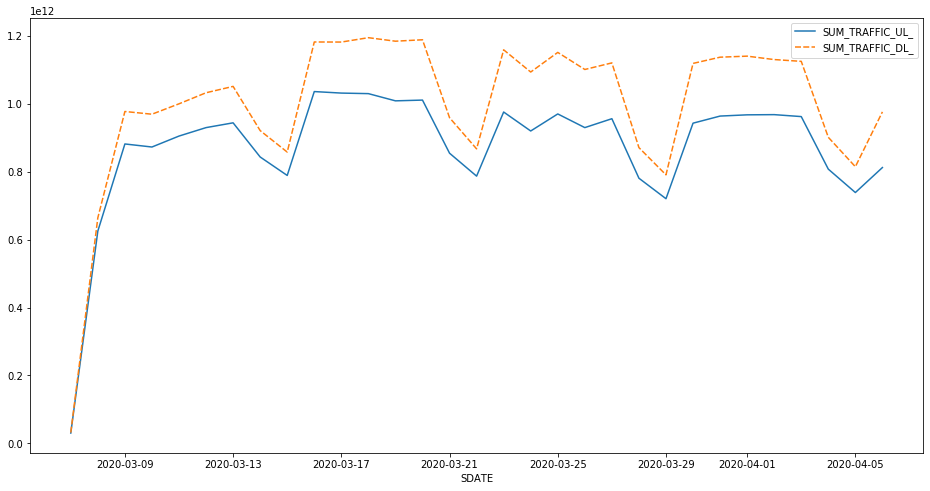

In [293]:
plt.figure(figsize=(16, 8))

# tsplot
sns.lineplot(data=time_df_sdate)
plt.show()

In [300]:
time_df_shour = df.groupby('SHOUR')['SUM_TRAFFIC_UL_','SUM_TRAFFIC_DL_'].sum()
print(time_df_shour.head())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


                     SUM_TRAFFIC_UL_  SUM_TRAFFIC_DL_
SHOUR                                                
1900-01-01 00:00:00     810756689184     877430222327
1900-01-01 01:00:00     559331610526     607090338614
1900-01-01 02:00:00     362979986371     396309401761
1900-01-01 03:00:00     259246700148     285153938970
1900-01-01 04:00:00     164797902462     183955775378


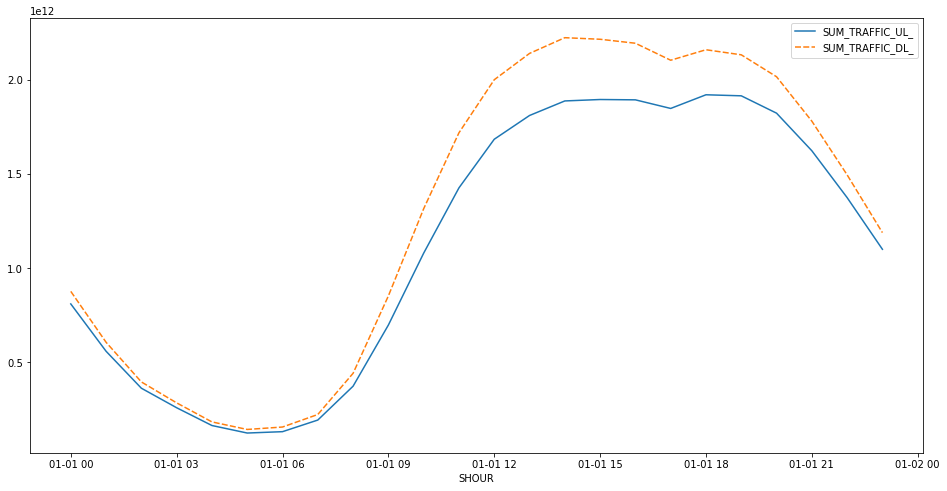

In [301]:
plt.figure(figsize=(16, 8))

# tsplot
sns.lineplot(data=time_df_shour)
plt.show()

#check the X axix is in DATE format.. which is 1900

In [307]:
df['SHOUR'] = df['SHOUR'].dt.time

In [308]:
df.groupby([df.SDATE, df.SHOUR]).SUM_TRAFFIC_UL_.sum()

SDATE       SHOUR   
2020-03-07  23:00:00    30711466470
2020-03-08  00:00:00    23610398338
            01:00:00    15487088055
            03:00:00    20166223971
            04:00:00     5351959790
                           ...     
2020-04-06  16:00:00    66998047311
            17:00:00    68494231177
            18:00:00    67903676729
            19:00:00    67771369027
            20:00:00    62212796286
Name: SUM_TRAFFIC_UL_, Length: 717, dtype: int64

In [309]:
time_df_sdate_shour = df.groupby([df.SDATE, df.SHOUR])['SUM_TRAFFIC_UL_','SUM_TRAFFIC_DL_'].sum()
time_df_sdate_shour

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


SUM_TRAFFIC_UL_  SUM_TRAFFIC_DL_
SDATE      SHOUR                                     
2020-03-07 23:00:00      30711466470      32158125670
2020-03-08 00:00:00      23610398338      24750605190
           01:00:00      15487088055      16324237421
           03:00:00      20166223971      21393077553
           04:00:00       5351959790       5761760525
...                              ...              ...
2020-04-06 16:00:00      66998047311      80461282444
           17:00:00      68494231177      80904757620
           18:00:00      67903676729      79130820882
           19:00:00      67771369027      77772511657
           20:00:00      62212796286      71344018192

[717 rows x 2 columns]

In [310]:
df_date_time = df.groupby('date_time')['SUM_TRAFFIC_UL_','SUM_TRAFFIC_DL_'].sum()
print(df_date_time.head())

                     SUM_TRAFFIC_UL_  SUM_TRAFFIC_DL_
date_time                                            
2020-03-07 23:00:00      30711466470      32158125670
2020-03-08 00:00:00      23610398338      24750605190
2020-03-08 01:00:00      15487088055      16324237421
2020-03-08 03:00:00      20166223971      21393077553
2020-03-08 04:00:00       5351959790       5761760525


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


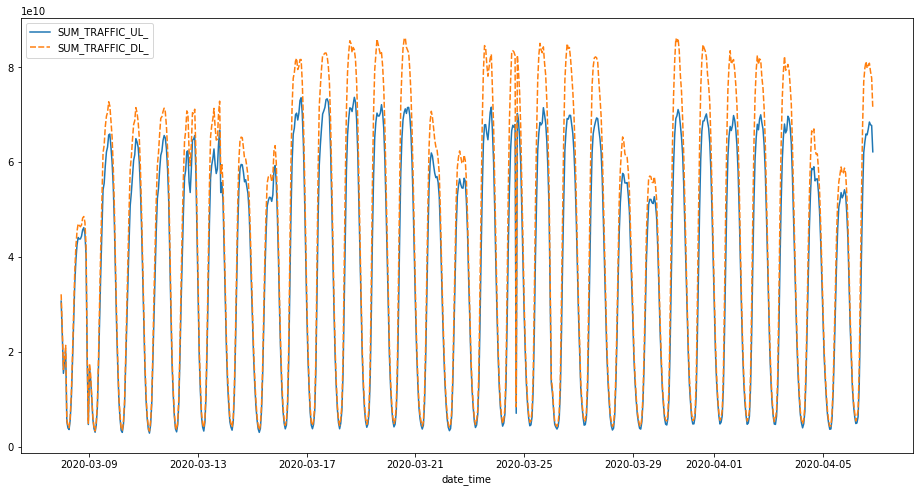

In [311]:
plt.figure(figsize=(16, 8))

# tsplot
sns.lineplot(data=df_date_time)
plt.show()

In [317]:
city = df.loc[:,'CITY'].values
town = df.loc[:,'TOWN'].values
ci = df.loc[:,'CI'].values
city
town
ci

array([302490103501579, 302490103221013, 302490105189162, ...,
       302490103451661, 302490103592490, 302490103842848])

In [318]:
type(town)

numpy.ndarray

In [323]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

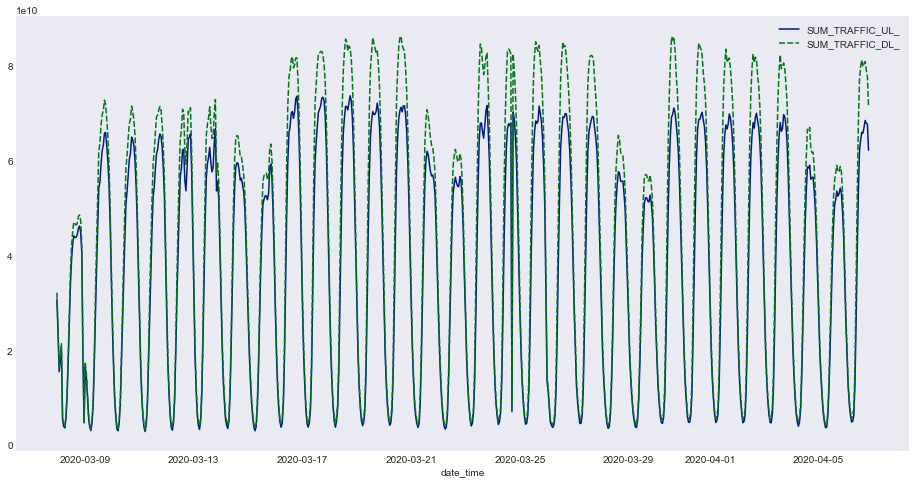

In [327]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(16, 8))

sns.lineplot(data=df_date_time)
plt.show()

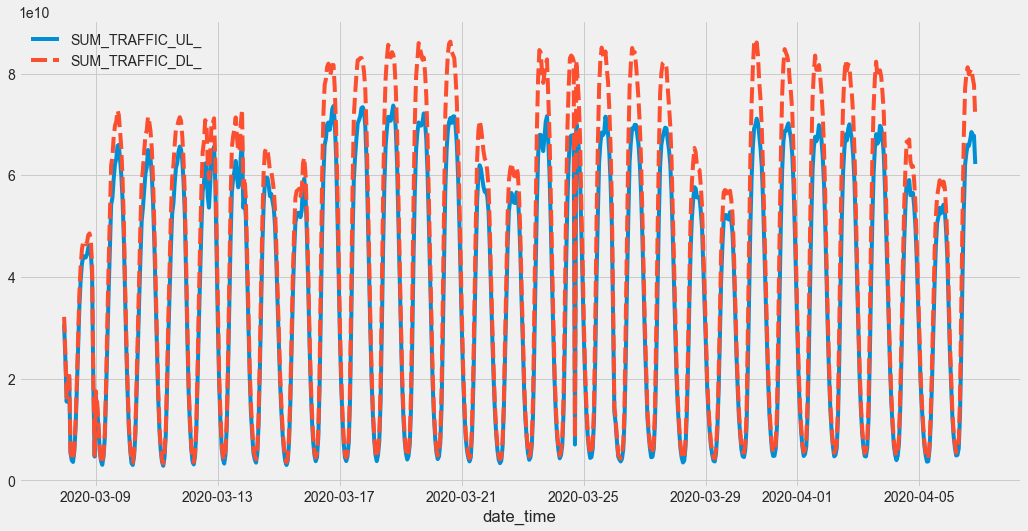

In [331]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 8))

sns.lineplot(data=df_date_time)
plt.show()

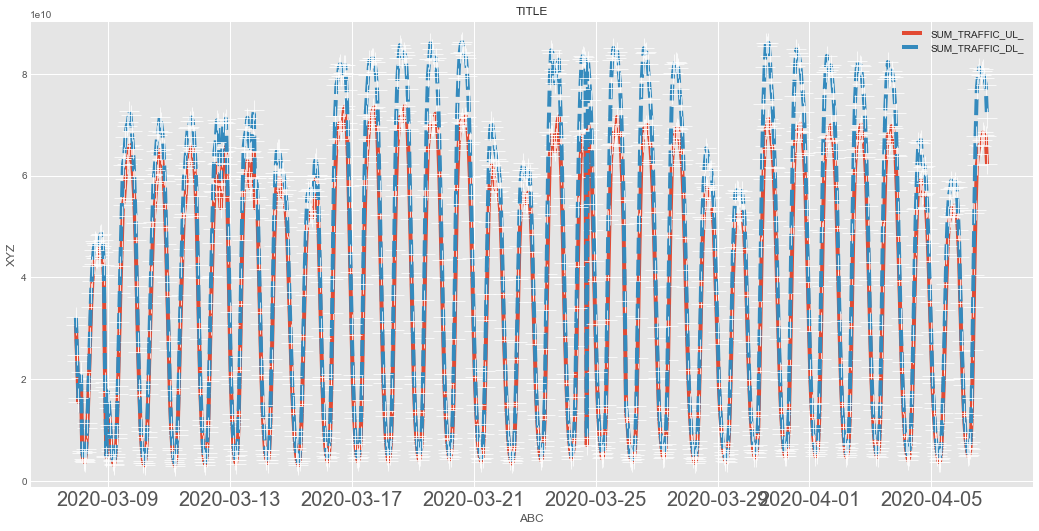

In [359]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))

sns.lineplot(data=df_date_time, marker = '+', markersize = 20)
plt.xlabel('ABC', fontsize = 12)
plt.ylabel('XYZ', fontsize = 12)
plt.title('TITLE', fontsize = 12)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 10)
#plt.legend(loc=(1.02,0), borderaxespad = 0. fontsize = 20)
fig.
#plt.savefig('image/mslegendcutoff.png', dpi = 300)
plt.show()

In [357]:
#object oriented approach
#fig, axes = plt.subplots (nrows = 1, cols = 1)
#axes.plot(df.a, df.b, c = 'k')

#axes.set_xlabel
#axes.set_ylabel
#axes.set_title
#axes.set_tick_params(axis = 'x', labelsize = 20)
#axes.set_tick_params(axis = 'y', labelsize = 20)



In [351]:
town_series = df.loc[:,'TOWN'].values
ul_traffic_series = df.loc[:,'SUM_TRAFFIC_UL_'].values
dl_traffic_series = df.loc[:,'SUM_TRAFFIC_DL_'].values


In [354]:
town_series

array(['AED', 'OBV', 'OTR', ..., 'ACA', 'AIR', 'BVI'], dtype=object)

In [360]:
df.head()

,SDATE,SHOUR,CITY,TOWN,CI,SUM_TRAFFIC_DL+TRAFFIC_UL_,SUM_TRAFFIC_DL_,SUM_TRAFFIC_UL_,COUNT_*_,COUNT_DISTINCT_MSISDN__,date_time
0,2020-03-07,23:00:00,B66,AED,302490103501579,33956823,16302611,17654212,92,42,2020-03-07 23:00:00
1,2020-03-07,23:00:00,B4,OBV,302490103221013,1213948,670521,543427,9,7,2020-03-07 23:00:00
2,2020-03-07,23:00:00,B4,OTR,302490105189162,2374220,1169179,1205041,2,2,2020-03-07 23:00:00
3,2020-03-07,23:00:00,B4,ACA,302490103425568,26332,18198,8134,2,2,2020-03-07 23:00:00
4,2020-03-07,23:00:00,B66,ACA,302490103469323,7575391,3594292,3981099,14,8,2020-03-07 23:00:00


In [366]:
df['CITY'].value_counts(dropna= False)

B66    4032806
B4     2979495
B13    1774674
B7     1090180
NaN      34100
B71        475
Name: CITY, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x5227770d0>,
 'caps': [<matplotlib.lines.Line2D at 0x117bc6e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x117bc6810>,
 'medians': [<matplotlib.lines.Line2D at 0x52208f190>,
 'fliers': [<matplotlib.lines.Line2D at 0x52208f350>,
 'means': []}

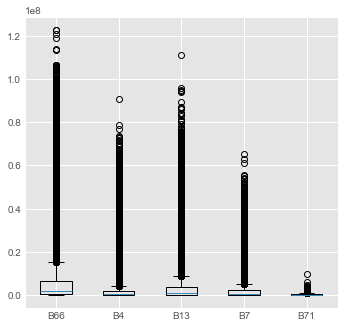

In [367]:
#plotting boxplot using series

B66 = df.loc[df['CITY'] == 'B66' , 'SUM_TRAFFIC_DL_']
B4 = df.loc[df['CITY'] == 'B4' , 'SUM_TRAFFIC_DL_']
B13 = df.loc[df['CITY'] == 'B13' , 'SUM_TRAFFIC_DL_']
B7 = df.loc[df['CITY'] == 'B7' , 'SUM_TRAFFIC_DL_']
B71 = df.loc[df['CITY'] == 'B71' , 'SUM_TRAFFIC_DL_']
plt.boxplot([B66,B4,B13,B7,B71] , labels = ['B66' , 'B4' , 'B13' , 'B7' , 'B71'])

Text(0.5, 1.0, ' ')

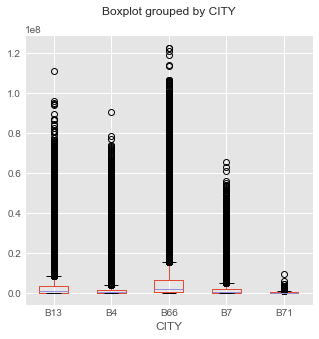

In [369]:
#plotting boxplot using pandas - easy and simple

df.boxplot(column = 'SUM_TRAFFIC_DL_' , by = 'CITY')
plt.title(' ')

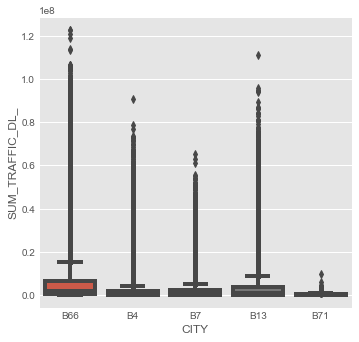

In [370]:
#plotting boxplot using seaborn, https://seaborn.pydata.org

sns.boxplot (x = 'CITY' , y = 'SUM_TRAFFIC_DL_' , data = df)

In [ ]:
#heatmaps, values depicted with colors
#sequential color plattern

#qualitative - descrete chunk of data

In [371]:
%matplotlib inline


In [379]:
#df.isnull().values.any()
df.isnull().values.sum()

73073

In [383]:
new_data = df[['SUM_TRAFFIC_DL+TRAFFIC_UL_', 'SUM_TRAFFIC_DL_', 'SUM_TRAFFIC_UL_', 'COUNT_*_','COUNT_DISTINCT_MSISDN__']].copy()


In [19]:
df_B66 = df.loc[df['CITY'] == 'B66']


In [20]:
df_B66

,SDATE,SHOUR,CITY,TOWN,CI,SUM_TRAFFIC_DL+TRAFFIC_UL_,SUM_TRAFFIC_DL_,SUM_TRAFFIC_UL_,COUNT_*_,COUNT_DISTINCT_MSISDN__,date_time
0,2020-03-07,1900-01-01 23:00:00,B66,AED,302490103501579,33956823,16302611,17654212,92,42,2020-03-07 23:00:00
4,2020-03-07,1900-01-01 23:00:00,B66,ACA,302490103469323,7575391,3594292,3981099,14,8,2020-03-07 23:00:00
6,2020-03-07,1900-01-01 23:00:00,B66,OTR,302490102426655,6877102,3912911,2964191,37,19,2020-03-07 23:00:00
7,2020-03-07,1900-01-01 23:00:00,B66,AED,302490103508245,24112565,13306680,10805885,36,19,2020-03-07 23:00:00
9,2020-03-07,1900-01-01 23:00:00,B66,BVA,302490103680789,4807828,3246228,1561600,26,16,2020-03-07 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2533349,2020-04-06,1900-01-01 20:00:00,B66,OCO,302490103275049,28677,14958,13719,4,1,2020-04-06 20:00:00
2533357,2020-04-06,1900-01-01 20:00:00,B66,BVI,302490103847967,403577,151879,251698,1,1,2020-04-06 20:00:00
2533358,2020-04-06,1900-01-01 20:00:00,B66,OTR,302490102541629,630987,283452,347535,1,1,2020-04-06 20:00:00
2533361,2020-04-06,1900-01-01 20:00:00,B66,OKT,302490102778891,10413,5111,5302,1,1,2020-04-06 20:00:00


In [21]:
df_B66_fil = df_B66.loc[ :, ['SUM_TRAFFIC_DL+TRAFFIC_UL_', 'SUM_TRAFFIC_DL_', 'SUM_TRAFFIC_UL_', 'COUNT_*_','COUNT_DISTINCT_MSISDN__']]


In [22]:
df_B66_fil

,SUM_TRAFFIC_DL+TRAFFIC_UL_,SUM_TRAFFIC_DL_,SUM_TRAFFIC_UL_,COUNT_*_,COUNT_DISTINCT_MSISDN__
0,33956823,16302611,17654212,92,42
4,7575391,3594292,3981099,14,8
6,6877102,3912911,2964191,37,19
7,24112565,13306680,10805885,36,19
9,4807828,3246228,1561600,26,16
...,...,...,...,...,...
2533349,28677,14958,13719,4,1
2533357,403577,151879,251698,1,1
2533358,630987,283452,347535,1,1
2533361,10413,5111,5302,1,1


In [25]:
dff = df_B66_fil.tail(10)

Text(0.5, 32.09375, 'Columns & fields')

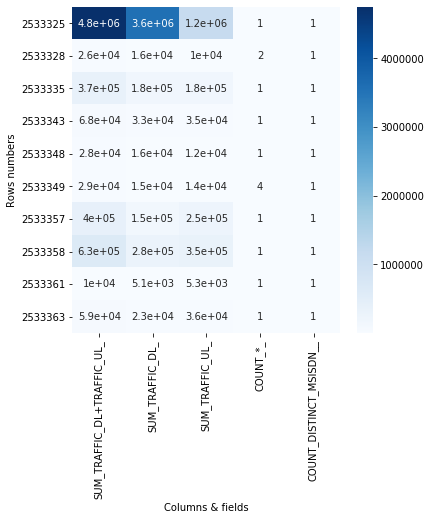

In [30]:
plt.figure(figsize = (6,6))
sns.heatmap(dff,annot = True, cmap = 'Blues')
plt.ylabel('Rows numbers')
plt.xlabel('Columns & fields')

In [31]:
#histogram - summary of # of samples appreasat in category
#how many falls in interval

%matplotlib inline 


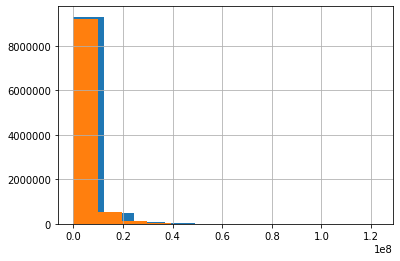

In [36]:
df.SUM_TRAFFIC_DL_.hist()
df.SUM_TRAFFIC_UL_.hist()
#df['SUM_TRAFFIC_DL+TRAFFIC_UL_'].hist()


(array([-2.50e+07,  0.00e+00,  2.50e+07,  5.00e+07,  7.50e+07,  1.00e+08,
         1.25e+08]),
 <a list of 7 Text xticklabel objects>)

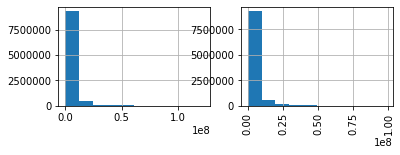

In [38]:
plt.figure()
plt.subplot(2,2,1)
df.SUM_TRAFFIC_DL_.hist()

plt.subplot(2,2,2)
df.SUM_TRAFFIC_UL_.hist()
plt.xticks(rotation = 90)
#df['SUM_TRAFFIC_DL+TRAFFIC_UL_'].hist()



(array([-2.50e+07,  0.00e+00,  2.50e+07,  5.00e+07,  7.50e+07,  1.00e+08,
         1.25e+08]),
 <a list of 7 Text xticklabel objects>)

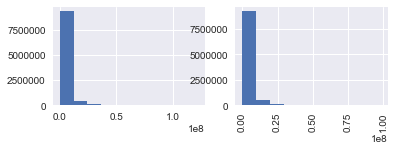

In [39]:
plt.figure()
plt.style.use('seaborn')

plt.subplot(2,2,1)
df.SUM_TRAFFIC_DL_.hist()

plt.subplot(2,2,2)
df.SUM_TRAFFIC_UL_.hist()
plt.xticks(rotation = 90)
#df['SUM_TRAFFIC_DL+TRAFFIC_UL_'].hist()




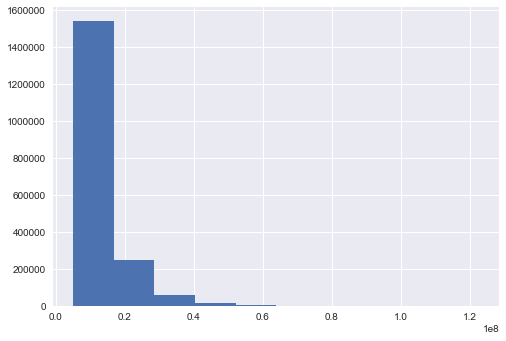

In [44]:
df_filter = df.loc[:,'SUM_TRAFFIC_DL_'] >= 5000000
df.loc[df_filter, 'SUM_TRAFFIC_DL_'].hist()
#df.loc[df_filter, 'SUM_TRAFFIC_DL_'].hist(bins = 10000, edgecolor = 'black')

In [45]:
#Creating subplots

In [47]:
#shortlisting columns names except last
df_short_clmns = df.columns[: -1]

In [48]:
df_short_clmns

Index(['SDATE', 'SHOUR', 'CITY', 'TOWN', 'CI', 'SUM_TRAFFIC_DL+TRAFFIC_UL_',
       'SUM_TRAFFIC_DL_', 'SUM_TRAFFIC_UL_', 'COUNT_*_',
       'COUNT_DISTINCT_MSISDN__'],
      dtype='object')

In [62]:
df.loc[df['CITY'] == 'B66', 'SUM_TRAFFIC_DL+TRAFFIC_UL_']

0          33956823
4           7575391
6           6877102
7          24112565
9           4807828
             ...   
2533349       28677
2533357      403577
2533358      630987
2533361       10413
2533363       58574
Name: SUM_TRAFFIC_DL+TRAFFIC_UL_, Length: 4032806, dtype: int64

In [68]:
df_B66 = df[df['CITY'] == 'B66']
df_B66.head()

,SDATE,SHOUR,CITY,TOWN,CI,SUM_TRAFFIC_DL+TRAFFIC_UL_,SUM_TRAFFIC_DL_,SUM_TRAFFIC_UL_,COUNT_*_,COUNT_DISTINCT_MSISDN__,date_time
0,2020-03-07,1900-01-01 23:00:00,B66,AED,302490103501579,33956823,16302611,17654212,92,42,2020-03-07 23:00:00
4,2020-03-07,1900-01-01 23:00:00,B66,ACA,302490103469323,7575391,3594292,3981099,14,8,2020-03-07 23:00:00
6,2020-03-07,1900-01-01 23:00:00,B66,OTR,302490102426655,6877102,3912911,2964191,37,19,2020-03-07 23:00:00
7,2020-03-07,1900-01-01 23:00:00,B66,AED,302490103508245,24112565,13306680,10805885,36,19,2020-03-07 23:00:00
9,2020-03-07,1900-01-01 23:00:00,B66,BVA,302490103680789,4807828,3246228,1561600,26,16,2020-03-07 23:00:00


In [69]:
df_B66_grp = df_B66.groupby('TOWN')['SUM_TRAFFIC_DL+TRAFFIC_UL_'].sum()
print(df_B66_grp.head())

TOWN
ACA    3532222679083
AED    2544503614300
AFS      34573739709
AIR     106195225258
ALB      31180286276
Name: SUM_TRAFFIC_DL+TRAFFIC_UL_, dtype: int64


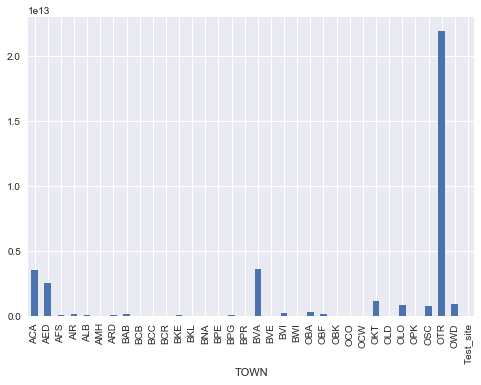

In [72]:
#ax = df_B66_grp.plot.bar(x = 'TOWN', y = 'SUM_TRAFFIC_DL+TRAFFIC_UL_', rot = 0)
df_B66_grp.T.plot(kind = 'bar')

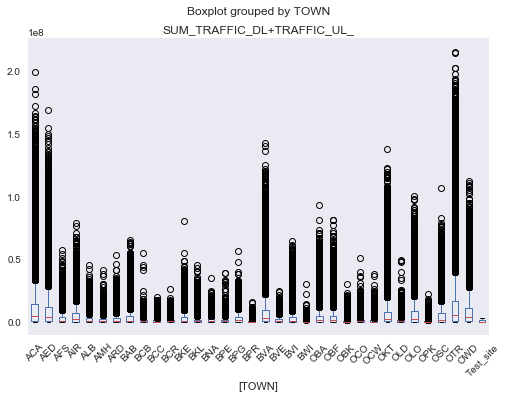

In [64]:
boxplot = df_B66.boxplot(column=['SUM_TRAFFIC_DL+TRAFFIC_UL_'], by = ['TOWN'],grid=False, rot=45, fontsize=10)

Text(0.5, 1.0, 'B71')

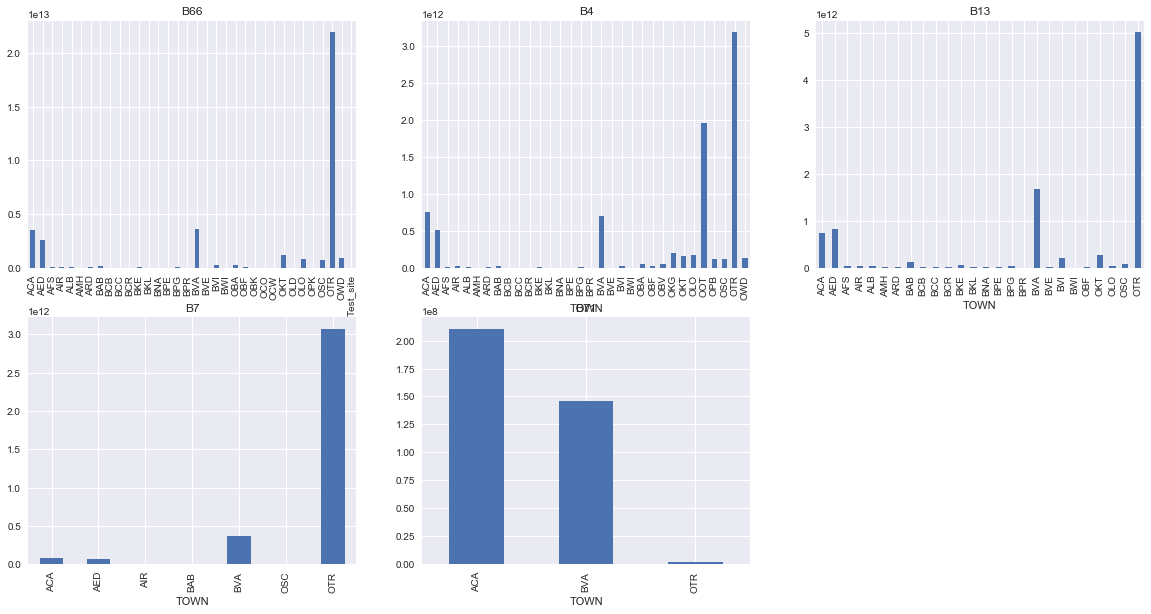

In [94]:
plt.figure(figsize = (20,10))

#first image
plt.subplot(2,3,1)
df_B66 = df[df['CITY'] == 'B66']
df_B66_grp = df_B66.groupby('TOWN')['SUM_TRAFFIC_DL+TRAFFIC_UL_'].sum()
df_B66_grp.T.plot(kind = 'bar')
plt.title('B66')

#second image
plt.subplot(2,3,2)
df_B4 = df[df['CITY'] == 'B4']
df_B4_grp = df_B4.groupby('TOWN')['SUM_TRAFFIC_DL+TRAFFIC_UL_'].sum()
df_B4_grp.T.plot(kind = 'bar')
plt.title('B4')

#third image
plt.subplot(2,3,3)
df_B13 = df[df['CITY'] == 'B13']
df_B13_grp = df_B13.groupby('TOWN')['SUM_TRAFFIC_DL+TRAFFIC_UL_'].sum()
df_B13_grp.T.plot(kind = 'bar')
plt.title('B13')

#second image
plt.subplot(2,3,4)
df_B7 = df[df['CITY'] == 'B7']
df_B7_grp = df_B7.groupby('TOWN')['SUM_TRAFFIC_DL+TRAFFIC_UL_'].sum()
df_B7_grp.T.plot(kind = 'bar')
plt.title('B7')

#third image
plt.subplot(2,3,5)
df_B71 = df[df['CITY'] == 'B71']
df_B71_grp = df_B71.groupby('TOWN')['SUM_TRAFFIC_DL+TRAFFIC_UL_'].sum()
df_B71_grp.T.plot(kind = 'bar')
plt.title('B71')

In [95]:
#subplots with for loop

#plt.figure(figsize = (10,2))
#pixel_colnames = df.columns[: -1]

#for index in range (0,5) :
#    plt.subplot(1,5, 1 + index)
#    image_values = df.loc[index, pixel_colnames].values
#    image_labels = df.loc[index, 'label']
#    plt.imshow(image_values.reshape(8,8), cmap = 'gray')
#    plt.title('Label' + str(image_label))


# tensor flow, time series prediction

In [98]:
band = df.CITY
band

0          B66
1           B4
2           B4
3           B4
4          B66
          ... 
2533366     B4
2533367    B13
2533368    B13
2533369     B4
2533370     B4
Name: CITY, Length: 9911730, dtype: object

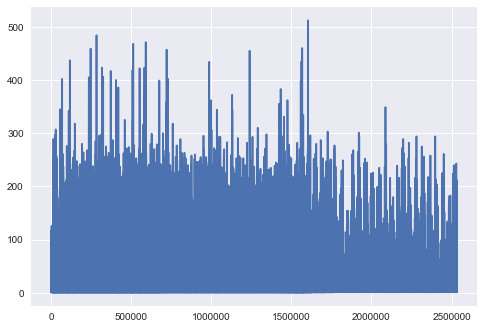

In [105]:
df_B13 = df[df['CITY'] == 'B13']
df_B13['COUNT_*_'].plot()


In [27]:
df.set_index('date_time', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9911730 entries, 2020-03-07 23:00:00 to 2020-04-06 20:00:00
Data columns (total 10 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   SDATE                       datetime64[ns]
 1   SHOUR                       datetime64[ns]
 2   CITY                        object        
 3   TOWN                        object        
 4   CI                          int64         
 5   SUM_TRAFFIC_DL+TRAFFIC_UL_  int64         
 6   SUM_TRAFFIC_DL_             int64         
 7   SUM_TRAFFIC_UL_             int64         
 8   COUNT_*_                    int64         
 9   COUNT_DISTINCT_MSISDN__     int64         
dtypes: datetime64[ns](2), int64(6), object(2)
memory usage: 831.8+ MB


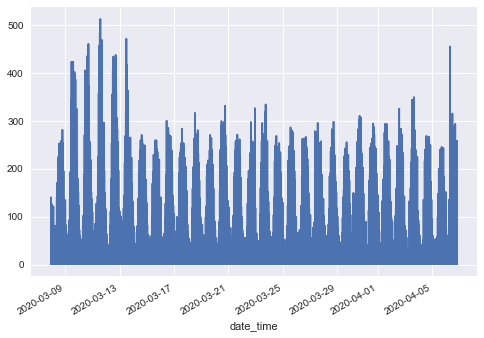

In [111]:
df_B13 = df[df['CITY'] == 'B13']
df_B13['COUNT_*_'].plot()


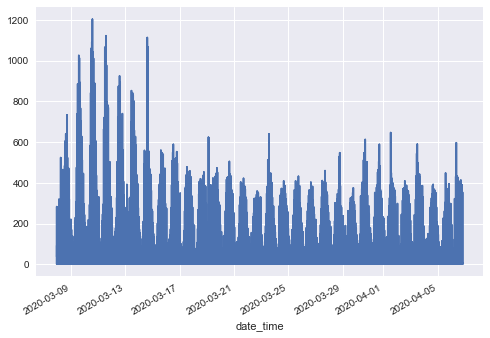

In [112]:
df_B66 = df[df['CITY'] == 'B66']
df_B66['COUNT_*_'].plot()



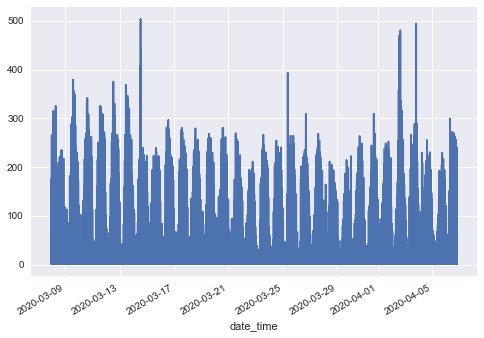

In [113]:
df_B4 = df[df['CITY'] == 'B4']
df_B4['COUNT_*_'].plot()


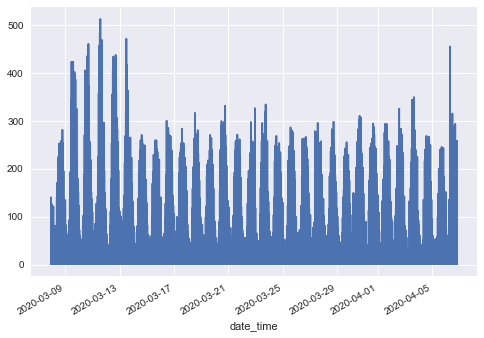

In [114]:
df_B13 = df[df['CITY'] == 'B13']
df_B13['COUNT_*_'].plot()


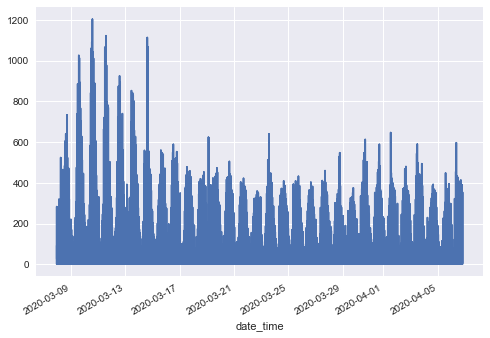

In [115]:
df['COUNT_*_'].plot()


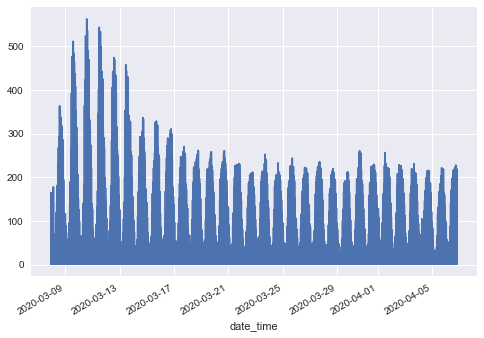

In [116]:
df['COUNT_DISTINCT_MSISDN__'].plot()


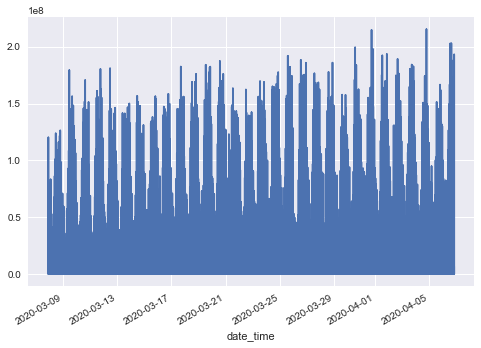

In [117]:
df['SUM_TRAFFIC_DL+TRAFFIC_UL_'].plot()



In [28]:
df_neww = df[['COUNT_*_', 'COUNT_DISTINCT_MSISDN__']]

In [29]:
df_neww.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9911730 entries, 2020-03-07 23:00:00 to 2020-04-06 20:00:00
Data columns (total 2 columns):
 #   Column                   Dtype
---  ------                   -----
 0   COUNT_*_                 int64
 1   COUNT_DISTINCT_MSISDN__  int64
dtypes: int64(2)
memory usage: 226.9 MB


<Figure size 432x288 with 0 Axes>

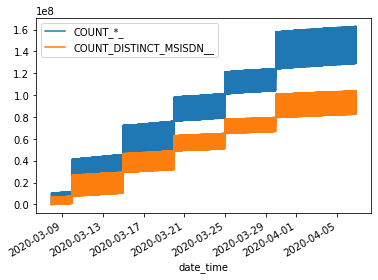

In [30]:
df_newww = df_neww.cumsum()
plt.figure()
df_newww.plot()

In [23]:
df_neww.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 9911730 entries, 0 to 2533370
Data columns (total 2 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   CITY                        object
 1   SUM_TRAFFIC_DL+TRAFFIC_UL_  int64 
dtypes: int64(1), object(1)
memory usage: 226.9+ MB


In [ ]:
df_neww.cumsum()

In [ ]:
df.column_name = df.column_name.astype(str)

In [39]:
df_table = pd.pivot_table(df, values=['COUNT_*_', 'COUNT_DISTINCT_MSISDN__'], columns = ['TOWN'], index=['date_time'], 
                       aggfunc=np.sum, fill_value=0)
df_table

COUNT_*_                                                  \
TOWN                     ACA    AED  AFS  AIR  ALB  AMH  ARD   BAB  BCB  BCC   
date_time                                                                      
2020-03-07 23:00:00    17977  15478  261  474  406   88  296  1441   60  103   
2020-03-08 00:00:00    13837  12676  256  307  275   81  223  1120   39   47   
2020-03-08 01:00:00     8353   8213  146  159  183   56  165   852   25   44   
2020-03-08 03:00:00    11036  10090  139  202  234   33  170  1209   45   86   
2020-03-08 04:00:00     3488   3168   53   49   56   10   67   282    8    8   
...                      ...    ...  ...  ...  ...  ...  ...   ...  ...  ...   
2020-04-06 16:00:00    36462  28116  538  942  562  159  494  2701  120  179   
2020-04-06 17:00:00    35214  27220  443  907  511  171  529  2512   98  154   
2020-04-06 18:00:00    33270  25873  498  887  546  206  456  2884  131  139   
2020-04-06 19:00:00    29359  22541  482  735  471  145  386  2545  122  152   
2020-04-06 20:00:00    26065  20505  368  748  378  137  343  2272  100  147   

                     ... COUNT_DISTINCT_MSISDN__                           \
TOWN                 ...                     OKT OLD   OLO   OOT  OPB OPK   
date_time            ...                                                    
2020-03-07 23:00:00  ...                    3401  31  2578  4076  295   2   
2020-03-08 00:00:00  ...                    2270  14  1967  2941  208   3   
2020-03-08 01:00:00  ...                    1419  11  1244  1792  120   3   
2020-03-08 03:00:00  ...                    1691  12  1606  2578  178   0   
2020-03-08 04:00:00  ...                     352   4   388   605   50   1   
...                  ...                     ...  ..   ...   ...  ...  ..   
2020-04-06 16:00:00  ...                    7293  42  5149  9106  711  24   
2020-04-06 17:00:00  ...                    7335  34  4791  8567  632  17   
2020-04-06 18:00:00  ...                    6414  27  4399  7848  669  18   
2020-04-06 19:00:00  ...                    5842  35  4100  7414  571  12   
2020-04-06 20:00:00  ...                    5168  30  3444  6119  417   9   

                                                   
TOWN                  OSC     OTR   OWD Test_site  
date_time                                          
2020-03-07 23:00:00  1891   67656  2273         0  
2020-03-08 00:00:00  1326   46736  1718         0  
2020-03-08 01:00:00   853   28091  1172         0  
2020-03-08 03:00:00  1213   37034  1556         0  
2020-03-08 04:00:00   270   10307   364         0  
...                   ...     ...   ...       ...  
2020-04-06 16:00:00  4712  142899  5263         0  
2020-04-06 17:00:00  4380  140963  5079         0  
2020-04-06 18:00:00  3909  128019  4497         0  
2020-04-06 19:00:00  3556  119355  4100         0  
2020-04-06 20:00:00  3002  106657  3556         0  

[717 rows x 76 columns]

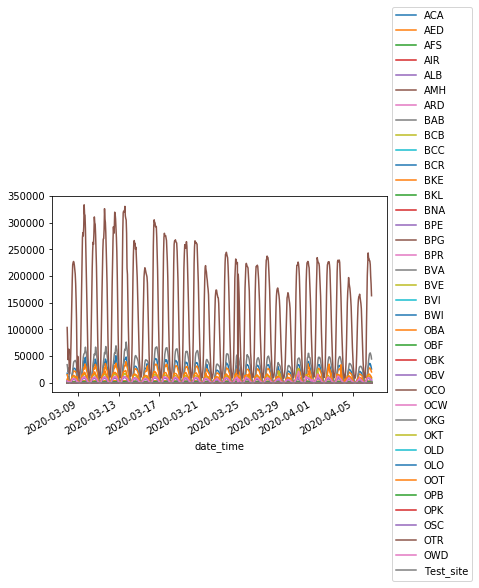

In [43]:
ax = df_table['COUNT_*_'].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [46]:
df_table1 = pd.pivot_table(df, values=['COUNT_*_', 'COUNT_DISTINCT_MSISDN__'], columns = ['TOWN'], index=['SDATE'], 
                       aggfunc=np.sum, fill_value=0)
df_table1.head()

COUNT_*_                                                            \
TOWN            ACA     AED   AFS    AIR   ALB   AMH   ARD    BAB   BCB   BCC   
SDATE                                                                           
2020-03-07    17977   15478   261    474   406    88   296   1441    60   103   
2020-03-08   341972  285313  5247   9354  5262  1526  5801  25684   882  1253   
2020-03-09   506709  385020  6789  12617  7634  2663  7711  36832  1316  2019   
2020-03-10   483398  384440  6699  11980  7948  2389  7317  35411  1333  1983   
2020-03-11   496093  381197  6706  12527  7341  2375  7777  35994  1374  2045   

            ... COUNT_DISTINCT_MSISDN__                                  \
TOWN        ...                     OKT  OLD    OLO     OOT    OPB  OPK   
SDATE       ...                                                           
2020-03-07  ...                    3401   31   2578    4076    295    2   
2020-03-08  ...                   93022  562  64760  109985   7881  135   
2020-03-09  ...                  130864  985  85836  150935  11251  254   
2020-03-10  ...                  128442  874  84358  149980  11027  238   
2020-03-11  ...                  132559  942  86314  163344  11023  215   

                                             
TOWN          OSC      OTR    OWD Test_site  
SDATE                                        
2020-03-07   1891    67656   2273         0  
2020-03-08  54622  1879658  63208         0  
2020-03-09  72279  2593711  84204         0  
2020-03-10  70379  2502512  85068         0  
2020-03-11  72347  2555624  85456         1  

[5 rows x 76 columns]

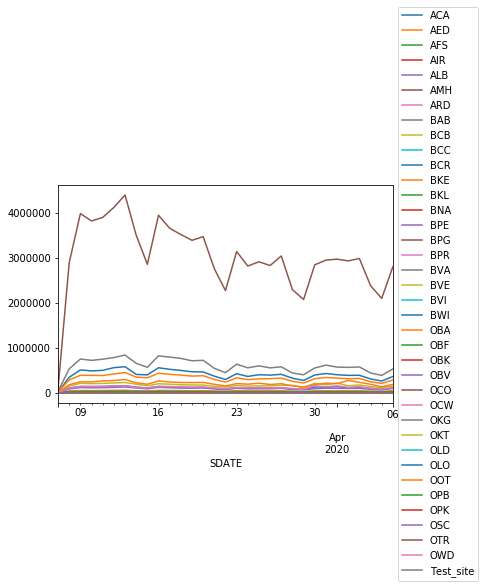

In [47]:
ax = df_table1['COUNT_*_'].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



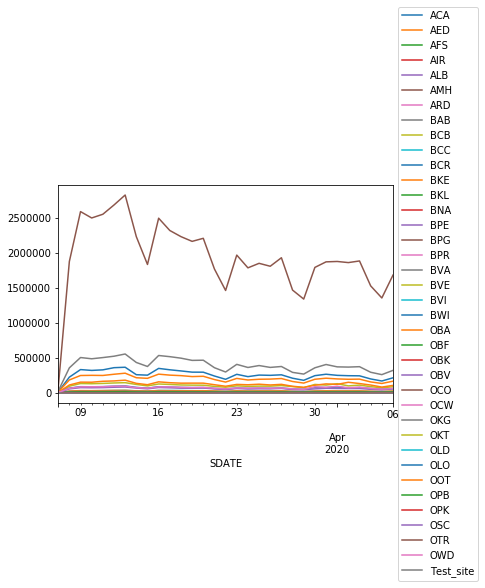

In [49]:
ax = df_table1['COUNT_DISTINCT_MSISDN__'].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))




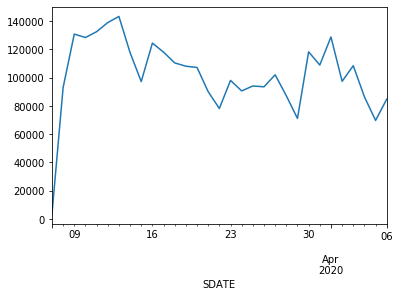

In [53]:
df_table1['COUNT_DISTINCT_MSISDN__']['OKT'].plot()